<a href="https://colab.research.google.com/github/Lucassius/An-lise-e-Caracteriza-o-Est-tica-de-Componentes-Eletr-nicos/blob/main/Hype_Case_Avancado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Célula de texto <undefined>
# %% [markdown]
# **Case Avançado Hype 2024.1**

Célula de texto <undefined>
# %% [markdown]
## Introdução

Célula de texto <undefined>
# %% [markdown]
Os membros da diretoria do Hype, de vez em quando, escolhem um jogo para jogarem juntos. O jogo escolhido da vez foi "Pokémon Omega Ruby / Alpha Sapphire", mais comumente chamado de "Pokémon ORAS".

Uma das atividades mais queridas entre os jogadores de Pokémon está a captura de todos os monstrinhos, porém trata-se de uma tarefa bem árdua dependendo do jogo da franquia. No caso de ORAS, estamos falando de mais de 700 pokémon.

Tendo em vista a dificuldade de capturar mais de 700 pokémon, os membros da diretoria decidiram dividir entre eles os pokémon para serem capturados. De forma que, juntando o pokémon de todos eles, teriam todos os pokémon do jogo. Porém, como fazer essa divisão?

Durante uma confraternização do Hype, a diretoria citou o desafio da divisão dos pokémon entre os outros membros do Hype, porém ninguém soube dar uma boa resposta para a pergunta. Após alguns dias, chegou um email misterioso na caixa de entrada do Hype com um conjunto de dados que havia as características dos pokémon e quem deveria capturar aquele pokémon.

Os membros da diretoria, estupefatos com a mensagem, começaram a se perguntar qual era a lógica por trás daquela divisão e, caso aquela divisão fosse coerente, como eles poderiam criar um classificador para usar em aventuras pokémon futuras.

## Instruções

O case tem como objetivo verificar se o candidato tem conhecimento o suficiente para fazer um projeto de classificação de dados utilizando algoritmos de Machine Learing. O notebook abaixo dá as instruções do que deve ser feito em cada etapa do projeto.

Você deve escrever seus códigos nas células indicadas. Pode inserir quantas célular achar necessário, mas não altere a ordem das resoluções.

Além da corretude, será avaliado também a organização e a lógica utilizada. O candidato deve deixar claro os motivos das escolhas que fizer no projeto (porque aplicou algum tratamento, algoritmo ou por que utilizou as variáveis que utilizou).

Entregas incompletas também serão aceitas. Os avaliadores irão analisar cada situação, então se não conseguir fazer tudo recomendamos que submeta o case mesmo assim.

Célula de texto <undefined>
# %% [markdown]
### Sua tarefa para esse case

Célula de texto <undefined>
# %% [markdown]
Sua tarefa consiste em entender o conjunto de dados e criar um classificador que consiga indicar qual membro da gestão deve capturar um pokémon. Para isso, seu trabalho será divido em 5 tarefas:

1. "Responda as questões": responda algumas perguntas de análise premilinar sobre o conjunto de dados utilizando pandas e numpy.

2. "Visualização dos dados": crie gráficos que respondam algumas questões sobre o conjunto de dados

3. "Preparação de dados": faça a limpeza e preparação dos dados; testar métodos de normalização e padronização, conforme necessário. Além disso, deve discutir e/ou abordar o tratamento de dados ausentes e duplicados.

4. "Aplicação e otimização do modelo": crie um classicador que consiga indicar com base nas características do pokémon quem deveria capturá-lo, detalhando o processo de treinamento.

5. "Avaliação": avalie o classificador criado, utilizando diferentes métricas de avaliação. A interpretação dos resultados deve ser clara, permitindo que se compreenda o desempenho do modelo em diferentes aspectos.

Mais detalhes das tarefas estão no decorrer do notebook.

Célula de texto <undefined>
# %% [markdown]
### Sobre o Conjunto de Dados

Célula de texto <undefined>
# %% [markdown]
O dataset possui as seguintes colunas:


- #: Número de indentificação do pokémon
- Name: Nome do pokémon
- Type 1: Tipo primário do pokémon
- Type 2: Tipo secundário do pokémon
- HP: "hit points", ou seja, a quantidade de dano que o pokémon pode sofrer antes de ser derrotado
- Attack: poder de ataque do pokémon
- Defense: poder de defesa do pokémon
- SP Atk: poder de ataque especial do pokémon
- SP Def: poder de defesa especial do pokémon
- Speed: determina qual pokémon ataca primeiro em cada rodada
- Total: soma de todos os stats do pokémon. Stats são o HP, Attack, Defense, Sp. Atk, Sp. Def e Speed
- Generation: geração do pokémon. Ao lançar um novo jogo principal de pokémon, vem uma nova leva de Pokémon que formam uma nova geração. Temos 6 gerações contempladas nesse conjunto.
- Legendary: indica se o pokémon é lendário ou não.
- Dono: um indicativo de quem deveria capturar o pokémon dentre os membros da diretoria do Hype.


Célula de texto <undefined>
# %% [markdown]
## Setup

Célula de texto <undefined>
# %% [markdown]
Antes de iniciar as tarefas, vamos setar algumas coisas:

Célula de texto <undefined>
# %% [markdown]
Na célula abaixo, importe todas as bibliotecas que você utilizará no case. Não faça imports fora além dessa célula, por favor.

Célula de código <undefined>
# %% [code]
# coloque aqui os seus import
import pandas as pd

Célula de texto <undefined>
# %% [markdown]
Abaixo há a leitura do conjunto de dados. Não leia nenhum conjunto de dados além desse e não altere a forma de leitura do dataset.

Célula de código <undefined>
# %% [code]
# leitura do dataset
pkmn = pd.read_csv('dataset/pokemon_hype.csv')

Célula de código <undefined>
# %% [code]
# visualização das 5 primeiras linhas
pkmn.head()
Saída da execução
4KB
	text/plain
		Unnamed: 0  #                   Name Type 1  Type 2  Total  HP  Attack  \
		0           0  1              Bulbasaur  Grass  Poison    318  45      49
		1           1  2                Ivysaur  Grass  Poison    405  60      62
		2           2  3               Venusaur  Grass  Poison    525  80      82
		3           3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100
		4           4  4             Charmander   Fire     NaN    309  39      52

		   Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary    Dono
		0       49       65       65     45           1      False  Thomaz
		1       63       80       80     60           1      False   Becky
		2       83      100      100     80           1      False   Becky
		3      123      122      120     80           1      False     Isa
		4       43       60       50     65           1      False  Thomaz

Célula de texto <undefined>
# %% [markdown]
## Tarefas

Célula de texto <undefined>
# %% [markdown]
Abaixo, em cada seção, realize as tarefas. Boa sorte!!!

Célula de texto <undefined>
# %% [markdown]
### **Seção 1: Respondas as questões**

Célula de texto <undefined>
# %% [markdown]
Com base no conjunto de dados, responda as perguntas abaixo utilizando Pandas ou Numpy para obter os resultados. Coloque seu código na célula marcada com "### Seu código" e sua resposta após o "Resposta". Fique a vontade para criar mais células para o seu código caso ache necessário.

O item "a" é um exemplo de resposta

Célula de texto <undefined>
# %% [markdown]
#### a. Dentre os pokémon de Fogo como 'Type 1', qual porcentagem deles são lendários? (Exemplo)

Célula de código <undefined>
# %% [code]
### Seu código
pkmn_fogo = pkmn[pkmn['Type 1'] == 'Fire']
pkmn_fogo_lendario = pkmn_fogo[pkmn['Legendary'] == 1]

len(pkmn_fogo_lendario)/len(pkmn_fogo)

Célula de texto <undefined>
# %% [markdown]
Resposta: aproximadamente 0.096

Célula de texto <undefined>
# %% [markdown]
#### b. Quantos pokémon existem com o tipo primário ("Type 1") "Fire" ? E como tipo segundário?

Célula de código <undefined>
# %% [code]
### Seu código


Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### c. Dentre os pokémon da 5ª geração que não possuem tipo fogo como tipo primário, nem como tipo secundário, qual possui a maior defesa?

Célula de código <undefined>
# %% [code]
### Seu código


Célula de texto <undefined>
# %% [markdown]
Resposta:

Célula de texto <undefined>
# %% [markdown]
#### d. Qual a geração de pokémon que possui a maior média de ataque entre os lendários?

Célula de código <undefined>
# %% [code]
### Seu código


Célula de texto <undefined>
# %% [markdown]
Resposta:

Célula de texto <undefined>
# %% [markdown]
#### e. Em relação aos donos dos pokémon, responda as seguintes perguntas:
- Qual dono tem a maior média entre os "total" dos pokémon?
- Qual dono possui mais pokémon lendários?
- Escolha um dos donos e diga qual geração ele possui mais pokémon.

Célula de código <undefined>
# %% [code]
### Seu código


Célula de código <undefined>
# %% [code]
### Seu código


Célula de código <undefined>
# %% [code]
### Seu código


Célula de texto <undefined>
# %% [markdown]
### **Seção 2: Visualização de Dados**

Célula de texto <undefined>
# %% [markdown]
Nessa seção, crie gráficos que respondam as seguintes perguntas:

a. Quais variáveis são mais correlacionadas?

b. Escolha 1 stat e responda a seguinte pergunta: a distribuição desse stat varia dependendo do dono? Dica: utilize box-plots ou histogramas.

c. Escolha 2 stats (pode repetir o da pergunta anterior) e responda a seguinte pergunta: considerando esses 2 stats, é possível distinguir através do gráfico os donos? Dica: utilize graficos de dispensão.

Fique a vontade para usar quantos gráficos achar necessário para responder as perguntas. Você pode usar 1 ou diversos gráficos para responder. Também fique a vontade para criar gráficos que descrevam o conjunto de dados além das perguntas feitas. Sugerimos as bibliotecas matplotlib e seaborn.

Além dos gráficos, é importante que escreva a sua interpretação do gráfico e o que ele diz sobre a pergunta feita.

Célula de texto <undefined>
# %% [markdown]
#### Pergunta a.

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Pergunta b.

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Pergunta c.

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
### **Seção 3: Preparação de dados**

Célula de texto <undefined>
# %% [markdown]
Antes de implementar o seu modelo de machine learning, faça o pré-processamento necessário para os seus dados. Tópicos importantes a serem resolvidos nessa seção são:

- Tratamento de dados nulos
- Normalização de variáveis numéricas
- Transformação de variáveis categoricas em numéricas
- Seleção de features

Não necessáriamente os tópicos acima devem ser resolvidos. Pode ser que o algoritmo de machine learning que você escolha não necessite dos tratamentos acima para funcionar ou para melhorar o desempenho. Porém, caso fosse necessário e você não realizou o tratamento, será descontado pontos.

Além dos tópicos acima, faça os tratamentos que julgar necessário.

Célula de texto <undefined>
# %% [markdown]
#### Dados nulos

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### One hot encoding

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Normalização

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Seleção de features

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
### **Seção 4: Aplicação e Otimização do modelo**

Célula de texto <undefined>
# %% [markdown]
Nessa seção, você deverá criar, treinar e testar um classificador que prediz o dono com base nas características do pokémon. Para isso, você deverá:

- Dividir o conjunto em treino e teste.
- Escolher um algoritmo de machine learning. Exemplos: Random Forest, KNN, Decision Tree, MLP.
- Treinar o modelo com os dados de treino.
- Predizer a label a partir das features de teste.
- Utilizar algum método para ajustar os hiperparâmetros. Discuta as melhorias obtidas.

Célula de texto <undefined>
# %% [markdown]
#### Separação Treino e Teste

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Aplicação do modelo

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### Hyperparameter Tuning

Célula de código <undefined>
# %% [code]
### Seu código

Célula de texto <undefined>
# %% [markdown]
#### **Seção 5: Avaliação**

Célula de texto <undefined>
# %% [markdown]
Avaliar o desempenho do modelo é crucial. Utilize pelo menos 3 métricas para essa avaliação, detalhando-as. O que as métricas indicam sobre o desempenho do seu modelo? Dica de métricas: acurácia e revocação.

Célula de código <undefined>
# %% [code]
### Seu código



##Bibliotecas utilizadas

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [24]:
pokemon_data = pd.read_csv("pokemon_hype.csv")

pokemon_data.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Dono
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Thomaz
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Becky
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Becky
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Isa
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Thomaz


In [26]:
pkm_fogo = pokemon_data[pokemon_data['Type 1'] == 'Fire']

##1
####a. Dentre os pokémon de Fogo como 'Type 1', qual porcentagem deles são lendários? (Exemplo)
pkm_fogo_lendario = pkm_fogo[pkm_fogo['Legendary'] == True]

pkm_fogo_lendario_percentual = len(pkm_fogo_lendario)/len(pkm_fogo)

print(f"{pkm_fogo_lendario_percentual:.2%} dos pokémon de Fogo são lendários.")

##b. Quantos pokémon existem com o tipo primário ("Type 1") "Fire" ? E como tipo segundário?
pkm_quantidade_primario = len(pokemon_data['Type 1'])
pkm_fogo_secundario = pokemon_data[pokemon_data['Type 2'] == 'Fire']

print(pkm_quantidade_primario, "pokémons existem com o tipo primário")
print(len(pkm_fogo_secundario), "pokémons existem com o tipo secundário 'Fire'.")

##c. Dentre os pokémon da 5ª geração que não possuem tipo fogo como tipo primário, nem como tipo secundário, qual possui a maior defesa?
pkm_5_geracao = pokemon_data[(pokemon_data['Generation'] == 5) & (pokemon_data['Type 1'] != 'Fire') & (pokemon_data['Type 2'] != 'Fire')]

pkm_maior_defesa = pkm_5_geracao.loc[pkm_5_geracao['Defense'].idxmax()]

print("O pokémon da 5ª geração com a maior defesa é:", pkm_maior_defesa['Name'])

##d. Qual a geração de pokémon que possui a maior média de ataque entre os lendários?
pkm_lendarios = pokemon_data[pokemon_data['Legendary'] == True]

pkm_media_ataque_por_geracao = pkm_lendarios.groupby('Generation')['Attack'].mean()

geracao_maior_media_ataque = pkm_media_ataque_por_geracao.idxmax()

print("A geração de pokémon com a maior média de ataque entre os lendários é:", geracao_maior_media_ataque)

#### e. Em relação aos donos dos pokémon, responda as seguintes perguntas:
##Qual dono tem a maior média entre os "total" dos pokémon?

dono_maior_media_total = pokemon_data.groupby('Dono')['Total'].mean().idxmax()

print("O dono com a maior média entre os 'Total' dos pokémon é:", dono_maior_media_total)

##Qual dono possui mais pokémon lendários?

dono_mais_lendarios = pokemon_data[pokemon_data['Legendary'] == True].groupby('Dono').size().idxmax()

print("O dono com mais pokémon lendários é:", dono_mais_lendarios)

##Qual geraçao o Thomaz possui mais pokemons?

thomaz_pokemons = pokemon_data[pokemon_data['Dono'] == 'Thomaz']

geracao_thomaz_mais_pokemons = thomaz_pokemons.groupby('Generation').size().idxmax()

print("O Thomaz possui mais pokemons da geração:", geracao_thomaz_mais_pokemons)





9.62% dos pokémon de Fogo são lendários.
800 pokémons existem com o tipo primário
12 pokémons existem com o tipo secundário 'Fire'.
O pokémon da 5ª geração com a maior defesa é: Cofagrigus
A geração de pokémon com a maior média de ataque entre os lendários é: 6
O dono com a maior média entre os 'Total' dos pokémon é: Isa
O dono com mais pokémon lendários é: Isa
O Thomaz possui mais pokemons da geração: 1


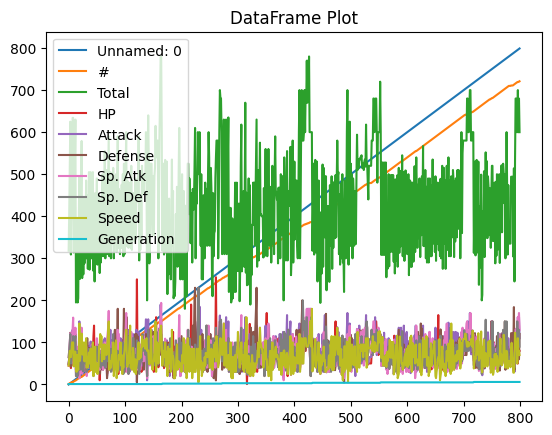

In [27]:
##Nessa seção, crie gráficos que respondam as seguintes perguntas:

##a. Crie gráficos e diga quais variáveis são mais correlacionadas?

df = pd.DataFrame(pokemon_data)
plot = df.plot(title="DataFrame Plot")




b. Escolha 1 stat e responda a seguinte pergunta: a distribuição desse stat varia dependendo do dono? Dica: utilize box-plots ou histogramas.

c. Escolha 2 stats (pode repetir o da pergunta anterior) e responda a seguinte pergunta: considerando esses 2 stats, é possível distinguir através do gráfico os donos? Dica: utilize graficos de dispensão.

Fique a vontade para usar quantos gráficos achar necessário para responder as perguntas. Você pode usar 1 ou diversos gráficos para responder. Também fique a vontade para criar gráficos que descrevam o conjunto de dados além das perguntas feitas. Sugerimos as bibliotecas matplotlib e seaborn.

Além dos gráficos, é importante que escreva a sua interpretação do gráfico e o que ele diz sobre a pergunta feita.


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


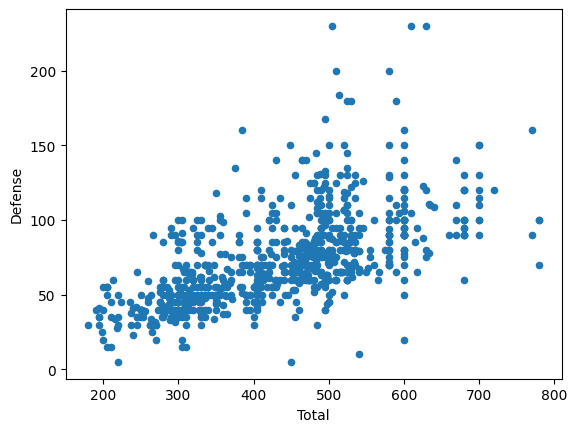

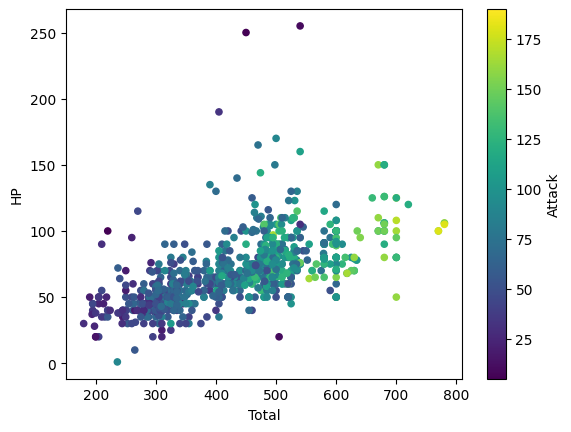

In [28]:
ax0 = df.plot.scatter(x='Total',
                       y = 'Defense',
                      colormap='viridis')




ax1 = df.plot.scatter(x='Total',
                      y='HP',
                      c='Attack',
                      colormap='viridis')

##b Sim, certamente a distribuição deve variar.
##c Não consegui distinguir os donos atrávés do gráfico


Os gráficos dizem que de certa forma é raro encontrar pokémons com muito HP e muita força de ataque, eles são minoria. Além disso, se aplicarmos um modelo de regressão, veremos que a grande maioria dos pokemons possuem um HP entre 30 e 100 e um ataque entre 30 e 100 também.




Antes de implementar o seu modelo de machine learning, faça o pré-processamento necessário para os seus dados. Tópicos importantes a serem resolvidos nessa seção são:

- Tratamento de dados nulos
- Normalização de variáveis numéricas
- Transformação de variáveis categoricas em numéricas
- Seleção de features

Não necessáriamente os tópicos acima devem ser resolvidos. Pode ser que o algoritmo de machine learning que você escolha não necessite dos tratamentos acima para funcionar ou para melhorar o desempenho. Porém, caso fosse necessário e você não realizou o tratamento, será descontado pontos.

Além dos tópicos acima, faça os tratamentos que julgar necessário.

KNN para previsão do pokemon legendário


In [83]:
# aqui eu estou removendo os dados nulos indesejáveis e basicamente colocando a média da coluna no lugar com o replace

zero_data = ['Total',	'HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def', 'Speed']

for column in zero_data:
    pokemon_data[column] =  pokemon_data[column].replace(0, np.nan)
    mean = int(pokemon_data[column].mean(skipna=True))
    pokemon_data[column] = pokemon_data[column].replace(np.nan, mean)

X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_data['Legendary']


#quando eu utilizo 0.2 ou 20% significa que estou separando 80% do dataset pra treino e 20% para teste, famoso 80/20
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(
X, y, pokemon_data.index, test_size=0.2, random_state=0)

#normalizando os valores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#utilização de 5 vizinhos e a métrica euclidiana, portanto p =2, se fosse no caso a métrica manhattan, utilizaríamos p=1,
#mas ñ é o caso
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

#predição
y_pred = knn.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print('Accuracy:', acuracia)
print(f"Acurácia em percentual:{acuracia:.2%}")



test_pokemons = pokemon_data.loc[test_index, ['Name', 'Legendary']].copy()
test_pokemons['Supostos_Lendarios'] = y_pred

#predição lendários
predicted_legendary = test_pokemons[test_pokemons['Supostos_Lendarios'] == True]

print("\n--- Pokémon previstos como LENDÁRIOS ---")
print(predicted_legendary[['Name', 'Legendary', 'Supostos_Lendarios']].to_string(index=False))
print("\n--- Resumo das previsões ---")
print(f"Total de Pokémon no teste: {len(test_pokemons)}")
print(f"Pokémon previstos como lendários: {len(predicted_legendary)}")
print(f"Desses, quantos REALMENTE são lendários: {sum(predicted_legendary['Legendary'] == True)}")


Accuracy: 0.93125
Acurácia em percentual:93.12%

--- Pokémon previstos como LENDÁRIOS ---
                     Name  Legendary  Supostos_Lendarios
                   Goodra      False                True
CharizardMega Charizard Y      False                True
    TornadusTherian Forme       True                True
       KyuremBlack Kyurem       True                True
                   Latios       True                True
                  Xerneas       True                True
                  Yveltal       True                True
        LatiasMega Latias       True                True

--- Resumo das previsões ---
Total de Pokémon no teste: 160
Pokémon previstos como lendários: 8
Desses, quantos REALMENTE são lendários: 6
